# Preprocessing

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind
from tqdm import tqdm
import numpy as np
import math
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

def load_ipeds_unis(fname='data/hd2020.csv', encoding='cp1252'):
    return pd.read_csv(fname, encoding=encoding)




unis     = load_ipeds_unis()




# print("Missing unis: %s " % set(rankings['Institution Name']).difference(merged['INSTNM']))

# CS vs. other majors

In [ ]:
fnames         = glob('completions_data/*/*.csv')
fnames         = [fname for fname in fnames if ('2000' not in fname) and ('2001' not in fname)]
dfs            = [pd.read_csv(fname) for fname in fnames]
dfs            = [df.rename(columns={col: col.upper().strip() for col in df.columns}) for df in dfs]
dfs            = [df[df['AWLEVEL'].apply(lambda x: x in [5, 7, 9, 17, 18, 19])] for df in dfs]
cs_maps        = [df['CIPCODE'].apply(lambda x: (x>=11) & (x<12)) for df in dfs]
cs_maps        = [cs_map.rename('CS') for cs_map in cs_maps] 
dfs            = [df[cs_maps[i]] for i, df in enumerate(dfs)] # New for PhD analysis 

In [ ]:
""" \AWELEVELS!!!!!
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
3	Associate's degree
5	Bachelor's degree
7	Master's degree
9	Doctor's degree
10	First-professional degree
1	Award of less than 1 academic year
2	Award of at least 1 but less than 2 academic years
4	Award of at least 2 but less than 4 academic years
6	Postbaccalaureate certificate
8	Post-master's certificate """

In [ ]:
years = [int(fname.split('/')[-1].split('.')[0][-4:]) for fname in fnames]
for i, df in enumerate(dfs):
    df['year'] = years[i]
    df['phd'] = df['AWLEVEL'].apply(lambda x: x not in [5, 7])
    df['ugd'] = df['AWLEVEL'] == 5 
    df['mst'] = df['AWLEVEL'] == 7 

all_dfs = pd.concat(dfs)
all_dfs = pd.merge(unis, all_dfs, on='UNITID')
phds =  all_dfs[all_dfs['phd']]
ugds =  all_dfs[all_dfs['ugd']]
msts =  all_dfs[all_dfs['mst']]



phds['total_abs'] = phds[['CTOTALT', 'CRACE24' ]].max(axis=1)
ugds['total_abs'] = ugds[['CTOTALT', 'CRACE24' ]].max(axis=1)
msts['total_abs'] = msts[['CTOTALT', 'CRACE24' ]].max(axis=1)

phds['women_abs'] = phds[['CTOTALW', 'CRACE16' ]].max(axis=1)
ugds['women_abs'] = ugds[['CTOTALW', 'CRACE16' ]].max(axis=1)
msts['women_abs'] = msts[['CTOTALW', 'CRACE16' ]].max(axis=1)



phds['women_abs'] = phds[['CTOTALW', 'CRACE16' ]].max(axis=1)
ugds['women_abs'] = ugds[['CTOTALW', 'CRACE16' ]].max(axis=1)
msts['women_abs'] = msts[['CTOTALW', 'CRACE16' ]].max(axis=1)


phds['black_abs'] = phds[['CBKAAT', 'CRACE18', 'DVCBKT' ]].max(axis=1)
ugds['black_abs'] = ugds[['CBKAAT', 'CRACE18', 'DVCBKT' ]].max(axis=1)
msts['black_abs'] = msts[['CBKAAT', 'CRACE18', 'DVCBKT' ]].max(axis=1)



phds['hisp_abs'] = phds[['CHISPT', 'CRACE21', 'DVCHST' ]].max(axis=1)
ugds['hisp_abs'] = ugds[['CHISPT', 'CRACE21', 'DVCHST' ]].max(axis=1)
msts['hisp_abs'] = msts[['CHISPT', 'CRACE21', 'DVCHST' ]].max(axis=1)


dtypes  = phds.dtypes
numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)


phd_counts = phds.groupby('year')[numerics].sum()
ugd_counts = ugds.groupby('year')[numerics].sum()
mst_counts = msts.groupby('year')[numerics].sum()




In [ ]:
plt.title('Women PhD (orange) vs. UGD (blue)')
plt.plot(phd_counts['women_abs'].loc[range(2011, 2022)], color='orange')
plt.twinx()
plt.plot(ugd_counts['women_abs'].loc[range(2011, 2022)])

In [ ]:
plt.title('Black PhD (orange) vs. UGD (blue)')
plt.plot(phd_counts['black_abs'].loc[range(2011, 2022)], color='orange')
plt.twinx()
plt.plot(ugd_counts['black_abs'].loc[range(2011, 2022)])

In [ ]:

plt.title('Hispanic PhD (orange) vs. UGD (blue)')
plt.plot(phd_counts['hisp_abs'].loc[range(2011, 2022)], color='orange')
plt.twinx()
plt.plot(ugd_counts['hisp_abs'].loc[range(2011, 2022)])

# Percentages: 

In [ ]:

phd_counts['women_pct'] = phd_counts['women_abs']/phd_counts['total_abs']
ugd_counts['women_pct'] = ugd_counts['women_abs']/ugd_counts['total_abs']

phd_counts['black_pct'] = phd_counts['black_abs']/phd_counts['total_abs']
ugd_counts['black_pct'] = ugd_counts['black_abs']/ugd_counts['total_abs']

phd_counts['hisp_pct'] = phd_counts['hisp_abs']/phd_counts['total_abs']
ugd_counts['hisp_pct'] = ugd_counts['hisp_abs']/ugd_counts['total_abs']


In [ ]:
all_dfs['AWLEVEL'].value_counts()

In [ ]:
phd_counts[['CHISPT', 'CRACE21', 'DVCHST']].max(axis=1).plot()

In [ ]:
phd_counts[['CBKAAT', 'CRACE18', 'DVCBKT']].max(axis=1).plot()

In [ ]:
plt.plot(phd_counts['women_pct'], label='PhD')
plt.plot(ugd_counts['women_pct'], label='Undergrad')
plt.legend()
plt.title('Women')

In [ ]:
# plt.plot(phd_counts['black_pct'].loc[range(2011, 2022)], label='PhD', color='orange')
plt.plot(phd_counts['black_pct'], label='PhD')
# plt.twinx()
plt.plot(ugd_counts['black_pct'], label='Undergrad')
plt.legend()
plt.title('Black')
# plt.xlim(2011, 2022)

In [ ]:
plt.plot(phd_counts['hisp_pct'].loc[range(2011, 2022)], label='PhD')
plt.plot(ugd_counts['hisp_pct'].loc[range(2011, 2022)], label='Undergrad')
plt.legend()
plt.title('Hispanic')


In [ ]:
phds.head()

In [ ]:
region_dict = {'1': 'New England CT ME MA NH RI VT', \
    '2': 'Mid East DE DC MD NJ NY PA ',\
    '3': 'Great Lakes IL IN MI OH WI ',\
    '4': 'Plains IA KS MN MO NE ND SD ',\
    '5': 'Southeast AL AR FL GA KY LA MS NC SC TN VA WV ',\
    '6': 'Southwest AZ NM OK TX ',\
    '7': 'Rocky Mountains CO ID MT UT WY ',\
    '8': 'Far West AK CA HI NV OR WA ',\
    '9': 'Outlying areas AS FM GU MH MP PR PW VI'
}

import pandas as pd

dtypes  = phds.dtypes
numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)

all_regions = list(all_dfs['OBEREG'].unique())

regional_phds = {}
regional_ugds = {}
regional_msts = {}

for region in all_regions: 

    phd_region = phds[phds['OBEREG'] == region].groupby('year')[numerics].sum()
    phd_region = phd_region.drop(columns='year')
    phd_region = phd_region.reset_index()
    
    mst_region = (msts[msts['OBEREG'] == region]).groupby('year')[numerics].sum()
    mst_region = mst_region.drop(columns='year')
    mst_region = mst_region.reset_index()
    
    ugd_region = (ugds[ugds['OBEREG'] == region]).groupby('year')[numerics].sum()
    ugd_region = ugd_region.drop(columns='year')
    ugd_region = ugd_region.reset_index()

    phd_region['women_pct'] = phd_region['women_abs']/phd_region['total_abs']
    ugd_region['women_pct'] = ugd_region['women_abs']/ugd_region['total_abs']

    phd_region['black_pct'] = phd_region['black_abs']/phd_region['total_abs']
    ugd_region['black_pct'] = ugd_region['black_abs']/ugd_region['total_abs']

    phd_region['hisp_pct'] = phd_region['hisp_abs']/phd_region['total_abs']
    ugd_region['hisp_pct'] = ugd_region['hisp_abs']/ugd_region['total_abs']

    regional_phds[region] = phd_region
    regional_ugds[region] = ugd_region
    regional_msts[region] = mst_region
msts['total_abs'], phds['total_abs']

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

for region in all_regions:
    if region == 0: 
        continue

    for demo in ['total']:
        fig = plt.figure()
        ax = fig.add_subplot(111)   
        ax.plot(regional_phds[region][demo+'_abs'], label=str(region_dict[str(region)])+" "+str(demo)+" PHD",color='orange')
        ax2= plt.twinx()

        ax2.plot(regional_ugds[region][demo+'_abs'],label=str(region_dict[str(region)])+" "+str(demo)+" Undergrad", color ="blue")
        ax2.plot(regional_msts[region][demo+'_abs'],label=str(region_dict[str(region)])+" "+str(demo)+" Master", color ='red')
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        ax.grid()
        ax.set_xlabel("Years (starting from 2002)")
        ax.set_ylabel(r"PHD Abs Counts")
        ax2.set_ylabel(r"Undergrad and Master Abs Counts")
        plt.show()



In [ ]:
carn_dict = {15: "Doctoral/Research Universities--Extensive",\
16 :"Doctoral/Research Universities--Intensive",\
21 :"Masters Colleges and Universities I",\
22 :"Masters (Comprehensive) Colleges and Universities II",\
31 :"Baccalaureate Colleges--Liberal Arts",\
32 :"Baccalaureate Colleges--General",\
33 :"Baccalaureate/Associates Colleges",\
40 :"Associates Colleges",\
51 :"Theological seminaries and other specialized faith-related institutions",\
52 :"Medical schools and medical centers",\
53 :"Other separate health profession schools",\
54 :"Schools of engineering and technology",\
55 :"Schools of business and management",\
56 :"Schools of art, music, and design",\
57 :"Schools of law",\
58 :"Teachers colleges",\
59 :"Other specialized institutions",\
60 :"Tribal Colleges and Universities"}


In [ ]:
import pandas as pd

dtypes  = phds.dtypes
numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)

carn_numbers = list(all_dfs['CARNEGIE'].unique())

carn_phds = {}
carn_ugds = {}
carn_msts = {}


for carn in carn_numbers: 

    phd_carn = phds[phds['CARNEGIE'] == carn].groupby('year')[numerics].sum()
    phd_carn = phd_carn.drop(columns='year')
    phd_carn = phd_carn.reset_index()
    
    ugd_carn = (ugds[ugds['CARNEGIE'] == carn]).groupby('year')[numerics].sum()
    ugd_carn = ugd_carn.drop(columns='year')
    ugd_carn = ugd_carn.reset_index()

    mst_carn = (msts[msts['CARNEGIE'] == carn]).groupby('year')[numerics].sum()
    mst_carn = mst_carn.drop(columns='year')
    mst_carn = mst_carn.reset_index()

    carn_phds[carn] = phd_carn
    carn_ugds[carn] = ugd_carn
    carn_msts[carn] = mst_carn

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

for carn in carn_numbers:
    if carn == -2:
        continue

    for demo in ['total']:
            fig = plt.figure()
            ax = fig.add_subplot(111) 
            ax.plot(carn_phds[carn][demo+'_abs'], label=str(carn_dict[(carn)])+" "+str(demo)+" PHD",color='orange')
            ax2 = plt.twinx()
            ax2.plot(carn_ugds[carn][demo+'_abs'],label=str(carn_dict[(carn)])+" "+str(demo)+" Undergrad", color='blue')
            ax2.plot(carn_msts[carn][demo+'_abs'],label=str(carn_dict[(carn)])+" "+str(demo)+" Master", color= 'red')
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2, loc=0)
            ax.grid()
            ax.set_xlabel("Years (starting from 2002)")
            ax.set_ylabel(r"PHD Abs Counts")
            ax2.set_ylabel(r"Undergrad and Master Abs Counts")
            plt.show()

In [ ]:
""" CCBASIC"""
basic_dict = { 1: "Associates--Public Rural-serving Small",\
2: "Associates--Public Rural-serving Medium",\
3: "Associates--Public Rural-serving Large",\
4: "Associates--Public Suburban-serving Single Campus", \
5: "Associates--Public Suburban-serving Multicampus", \
6: "Associates--Public Urban-serving Single Campus", \
7: "Associates--Public Urban-serving Multicampus", \
8: "Associates--Public Special Use", \
9: "Associates--Private Not-for-profit", \
10: "Associates--Private For-profit", \
11: "Associates--Public 2-year colleges under 4-year universities", \
12: "Associates--Public 4-year Primarily Associates", \
13: "Associates--Private Not-for-profit 4-year Primarily Associates", \
14: "Associates--Private For-profit 4-year Primarily Associates", \
15: "Research Universities (very high research activity)", \
16: "Research Universities (high research activity)", \
17: "Doctoral/Research Universities", \
18: "Masters Colleges and Universities (larger programs)", \
19: "Masters Colleges and Universities (medium programs)", \
20: "Masters Colleges and Universities (smaller programs)", \
21: "Baccalaureate Colleges--Arts & Sciences", \
22: "Baccalaureate Colleges--Diverse Fields", \
23: "Baccalaureate/Associates Colleges", \
24: "Theological seminaries, Bible colleges, and other faith-related institutions", \
25: "Medical schools and medical centers", \
26: "Other health professions schools", \
27: "Schools of engineering", \
28: "Other technology-related schools", \
29: "Schools of business and management", \
30: "Schools of art, music, and design", \
31: "Schools of law", \
32: "Other special-focus institutions", \
33: "Tribal Colleges " }


In [ ]:
import pandas as pd

dtypes  = phds.dtypes
numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)

basics = list(all_dfs['CCBASIC'].unique())

base_phds = {}
base_ugds = {}
base_msts = {}


for base in basics: 

    phd_base = phds[phds['CCBASIC'] == base].groupby('year')[numerics].sum()
    phd_base = phd_base.drop(columns='year')
    phd_base = phd_base.reset_index()
    
    ugd_base = (ugds[ugds['CCBASIC'] == base]).groupby('year')[numerics].sum()
    ugd_base = ugd_base.drop(columns='year')
    ugd_base = ugd_base.reset_index()

    mst_base = (msts[msts['CCBASIC'] == base]).groupby('year')[numerics].sum()
    mst_base = mst_base.drop(columns='year')
    mst_base = mst_base.reset_index()

    base_phds[base] = phd_base
    base_ugds[base] = ugd_base
    base_msts[base] = mst_base

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

for base in basics:
    if base == -2:
          continue
    for demo in ['total']:
            fig = plt.figure()
            ax = fig.add_subplot(111) 
            ax.plot(base_phds[base][demo+'_abs'], label=str(basic_dict[(base)])+" "+str(demo)+" PHD",color='orange')
            ax2= plt.twinx()
            ax2.plot(base_ugds[base][demo+'_abs'],label=str(basic_dict[(base)])+" "+str(demo)+" Undergrad", color= 'blue')
            ax2.plot(base_msts[base][demo+'_abs'],label=str(basic_dict[(base)])+" "+str(demo)+" Master", color= 'red')
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2)
            ax.grid()
            ax.set_xlabel("Years (starting from 2002)")
            ax.set_ylabel(r"PHD Abs Counts")
            ax2.set_ylabel(r"Undergrad and Master Abs Counts")
            plt.show()
            

In [349]:
# INSTSIZE
size_dict= { 1: "Under 1,000", 
2: "1,000 - 4,999", \
3: "5,000 - 9,999", \
4: "10,000 - 19,999", \
5: "20,000 and above", \
-1:	"Not reported", \
-2: "Not applicable"} 


In [ ]:
import pandas as pd

dtypes  = phds.dtypes
numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)

sizes = list(all_dfs['INSTSIZE'].unique())

inst_phds = {}
inst_ugds = {}
inst_msts = {}


for size in sizes: 

    phd_size = phds[phds['INSTSIZE'] == size].groupby('year')[numerics].sum()
    phd_size = phd_size.drop(columns='year')
    phd_size = phd_size.reset_index()
    
    ugd_size = (ugds[ugds['INSTSIZE'] == size]).groupby('year')[numerics].sum()
    ugd_size = ugd_size.drop(columns='year')
    ugd_size = ugd_size.reset_index()

    mst_size = msts[msts['INSTSIZE'] == size].groupby('year')[numerics].sum()
    mst_size = mst_size.drop(columns='year')
    mst_size = mst_size.reset_index()

    inst_phds[size] = phd_size
    inst_ugds[size] = ugd_size
    inst_msts[size] = mst_size


1


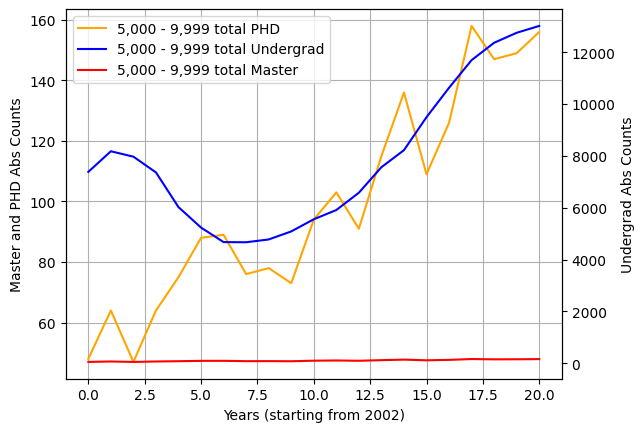

1


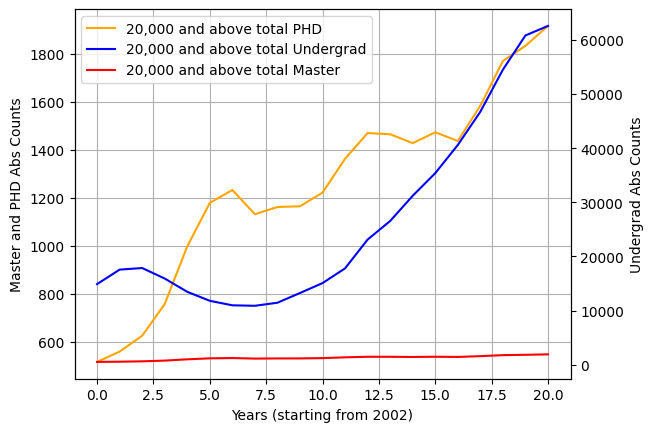

1


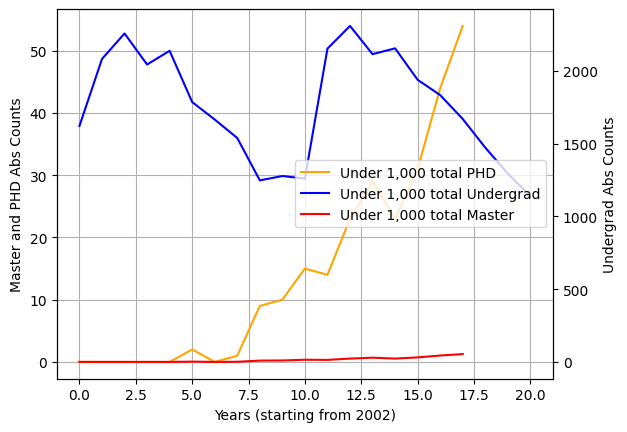

1


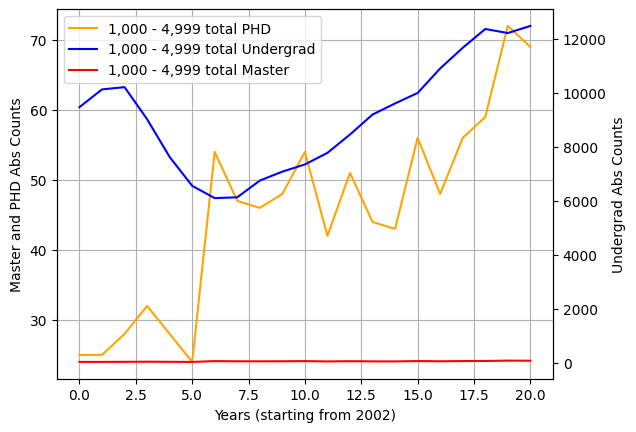

1


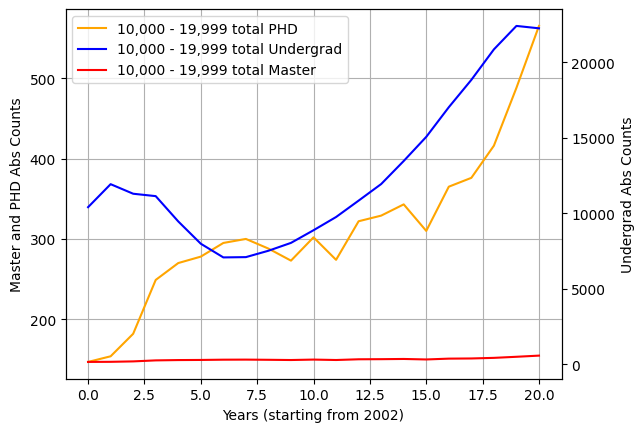

1


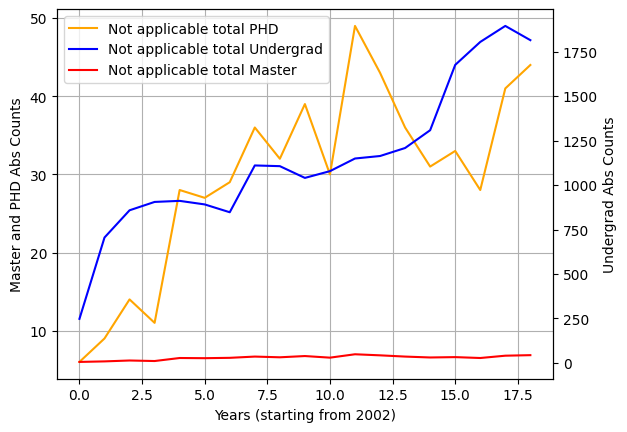

1


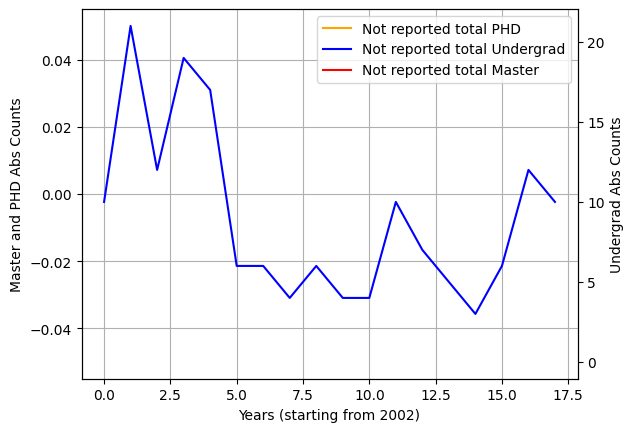

In [356]:
import pandas as pd
from matplotlib import pyplot as plt


for size in sizes:
    
    for demo in ['total']:
            print(1)
            fig = plt.figure()
            ax = fig.add_subplot(111) 
            ax.plot(inst_phds[size][demo+'_abs'], label=str(size_dict[(size)])+" "+str(demo)+" PHD",color='orange')

            ax2 = plt.twinx()
            ax2.plot(inst_ugds[size][demo+'_abs'],label=str(size_dict[(size)])+" "+str(demo)+" Undergrad", color = 'blue')
            ax2.plot(inst_msts[size][demo+'_abs'],label=str(size_dict[(size)])+" "+str(demo)+" Master", color = 'red')

            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2)
            ax.grid()
            ax.set_xlabel("Years (starting from 2002)")
            ax.set_ylabel(r"Master and PHD Abs Counts")
            ax2.set_ylabel(r"Undergrad Abs Counts")
            plt.show()
  

In [ ]:
# # legend.( '1 - New England CT ME MA NH RI VT' \
# # '2 - Mid East DE DC MD NJ NY PA '\
# # '3 - Great Lakes IL IN MI OH WI '\
# # '4 - Plains IA KS MN MO NE ND SD '\
# # '5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV '\
# # '6 - Southwest AZ NM OK TX '\
# # '7 - Rocky Mountains CO ID MT UT WY '\
# # '8 - Far West AK CA HI NV OR WA '\
# # '9 - Outlying areas AS FM GU MH MP PR PW VI')
# import pandas as pd

# dtypes  = phds.dtypes
# numerics = list(dtypes[(dtypes == int) | (dtypes == float)].index)
# phd_new_engl = phds[phds['OBEREG'] == 1].groupby('year')[numerics].sum()
# phd_new_engl = phd_new_engl.drop(columns='year')
# phd_new_engl = phd_new_engl.reset_index()
# ugd_new_engl = (ugds[ugds['OBEREG'] == 1]).groupby('year')[numerics].sum()
# ugd_new_engl = ugd_new_engl.drop(columns='year')
# ugd_new_engl = ugd_new_engl.reset_index()
# phd_new_engl['women_pct'] = phd_new_engl['women_abs']/phd_new_engl['total_abs']
# ugd_new_engl['women_pct'] = ugd_new_engl['women_abs']/ugd_new_engl['total_abs']

# phd_new_engl['black_pct'] = phd_new_engl['black_abs']/phd_new_engl['total_abs']
# ugd_new_engl['black_pct'] = ugd_new_engl['black_abs']/ugd_new_engl['total_abs']

# phd_new_engl['hisp_pct'] = phd_new_engl['hisp_abs']/phd_new_engl['total_abs']
# ugd_new_engl['hisp_pct'] = ugd_new_engl['hisp_abs']/ugd_new_engl['total_abs']



# phd_mid_east = phds[phds['OBEREG'] == 2].groupby('year')[numerics].sum()
# phd_mid_east = phd_mid_east.drop(columns='year')
# phd_mid_east = phd_mid_east.reset_index()
# ugd_mid_east = ugds[ugds['OBEREG'] == 2].groupby('year')[numerics].sum()
# ugd_mid_east = ugd_mid_east.drop(columns='year')
# ugd_mid_east = ugd_mid_east.reset_index()

# phd_mid_east['women_pct'] = phd_mid_east['women_abs']/phd_mid_east['total_abs']
# ugd_mid_east['women_pct'] = ugd_mid_east['women_abs']/ugd_mid_east['total_abs']

# phd_mid_east['black_pct'] = phd_mid_east['black_abs']/phd_mid_east['total_abs']
# ugd_mid_east['black_pct'] = ugd_mid_east['black_abs']/ugd_mid_east['total_abs']

# phd_mid_east['hisp_pct'] = phd_mid_east['hisp_abs']/phd_mid_east['total_abs']
# ugd_mid_east['hisp_pct'] = ugd_mid_east['hisp_abs']/ugd_mid_east['total_abs']





# phd_grt_lake = phds[phds['OBEREG'] == 3].groupby('year')[numerics].sum()
# phd_grt_lake = phd_grt_lake.drop(columns='year')
# phd_grt_lake = phd_grt_lake.reset_index()
# ugd_grt_lake = ugds[ugds['OBEREG'] == 3].groupby('year')[numerics].sum()
# ugd_grt_lake = ugd_grt_lake.drop(columns='year')
# ugd_grt_lake = ugd_grt_lake.reset_index()



# phd_grt_lake['women_pct'] = phd_grt_lake['women_abs']/phd_grt_lake['total_abs']
# ugd_grt_lake['women_pct'] = ugd_grt_lake['women_abs']/ugd_grt_lake['total_abs']

# phd_grt_lake['black_pct'] = phd_grt_lake['black_abs']/phd_grt_lake['total_abs']
# ugd_grt_lake['black_pct'] = ugd_grt_lake['black_abs']/ugd_grt_lake['total_abs']

# phd_grt_lake['hisp_pct'] = phd_grt_lake['hisp_abs']/phd_grt_lake['total_abs']
# ugd_grt_lake['hisp_pct'] = ugd_grt_lake['hisp_abs']/ugd_grt_lake['total_abs']




# phd_plains = phds[phds['OBEREG'] == 4].groupby('year')[numerics].sum()
# phd_plains = phd_plains.drop(columns='year')
# phd_plains = phd_plains.reset_index()
# ugd_plains = ugds[ugds['OBEREG'] == 4].groupby('year')[numerics].sum()
# ugd_plains = ugd_plains.drop(columns='year')
# ugd_plains = ugd_plains.reset_index()
# phd_plains['women_pct'] = phd_plains['women_abs']/phd_plains['total_abs']
# ugd_plains['women_pct'] = ugd_plains['women_abs']/ugd_plains['total_abs']

# phd_plains['black_pct'] = phd_plains['black_abs']/phd_plains['total_abs']
# ugd_plains['black_pct'] = ugd_plains['black_abs']/ugd_plains['total_abs']

# phd_plains['hisp_pct'] = phd_plains['hisp_abs']/phd_plains['total_abs']
# ugd_plains['hisp_pct'] = ugd_plains['hisp_abs']/ugd_plains['total_abs']



# phd_sth_east = phds[phds['OBEREG'] == 5].groupby('year')[numerics].sum()
# phd_sth_east = phd_sth_east.drop(columns='year')
# phd_sth_east = phd_sth_east.reset_index()
# ugd_sth_east = ugds[ugds['OBEREG'] == 5].groupby('year')[numerics].sum()
# ugd_sth_east = ugd_sth_east.drop(columns='year')
# ugd_sth_east = ugd_sth_east.reset_index()
# phd_sth_east['women_pct'] = phd_sth_east['women_abs']/phd_sth_east['total_abs']
# ugd_sth_east['women_pct'] = ugd_sth_east['women_abs']/ugd_sth_east['total_abs']

# phd_sth_east['black_pct'] = phd_sth_east['black_abs']/phd_sth_east['total_abs']
# ugd_sth_east['black_pct'] = ugd_sth_east['black_abs']/ugd_sth_east['total_abs']

# phd_sth_east['hisp_pct'] = phd_sth_east['hisp_abs']/phd_sth_east['total_abs']
# ugd_sth_east['hisp_pct'] = ugd_sth_east['hisp_abs']/ugd_sth_east['total_abs']




# phd_sth_west = phds[phds['OBEREG'] == 6].groupby('year')[numerics].sum()
# phd_sth_west = phd_sth_west.drop(columns='year')
# phd_sth_west = phd_sth_west.reset_index()
# ugd_sth_west = ugds[ugds['OBEREG'] == 6].groupby('year')[numerics].sum()
# ugd_sth_west = ugd_sth_west.drop(columns='year')
# ugd_sth_west = ugd_sth_west.reset_index()
# phd_sth_west['women_pct'] = phd_sth_west['women_abs']/phd_sth_west['total_abs']
# ugd_sth_west['women_pct'] = ugd_sth_west['women_abs']/ugd_sth_west['total_abs']

# phd_sth_west['black_pct'] = phd_sth_west['black_abs']/phd_sth_west['total_abs']
# ugd_sth_west['black_pct'] = ugd_sth_west['black_abs']/ugd_sth_west['total_abs']

# phd_sth_west['hisp_pct'] = phd_sth_west['hisp_abs']/phd_sth_west['total_abs']
# ugd_sth_west['hisp_pct'] = ugd_sth_west['hisp_abs']/ugd_sth_west['total_abs']



# phd_rock_mt = phds[phds['OBEREG'] == 7].groupby('year')[numerics].sum()
# phd_rock_mt = phd_new_engl.drop(columns='year')
# phd_rock_mt = phd_rock_mt.reset_index()
# ugd_rock_mt = ugds[ugds['OBEREG'] == 7].groupby('year')[numerics].sum()
# ugd_rock_mt = ugd_rock_mt.drop(columns='year')
# ugd_rock_mt = ugd_rock_mt.reset_index()
# phd_rock_mt['women_pct'] = phd_rock_mt['women_abs']/phd_rock_mt['total_abs']
# ugd_rock_mt['women_pct'] = ugd_rock_mt['women_abs']/ugd_rock_mt['total_abs']

# phd_rock_mt['black_pct'] = phd_rock_mt['black_abs']/phd_rock_mt['total_abs']
# ugd_rock_mt['black_pct'] = ugd_rock_mt['black_abs']/ugd_rock_mt['total_abs']

# phd_rock_mt['hisp_pct'] = phd_rock_mt['hisp_abs']/phd_rock_mt['total_abs']
# ugd_rock_mt['hisp_pct'] = ugd_rock_mt['hisp_abs']/ugd_rock_mt['total_abs']




# phd_far_west = phds[phds['OBEREG'] == 8].groupby('year')[numerics].sum()
# phd_far_west = phd_far_west.drop(columns='year')
# phd_far_west = phd_far_west.reset_index()
# ugd_far_west = ugds[ugds['OBEREG'] == 8].groupby('year')[numerics].sum()
# ugd_far_west = ugd_far_west.drop(columns='year')
# ugd_far_west = ugd_far_west.reset_index()
# ugd_far_west
# phd_far_west['women_pct'] = phd_far_west['women_abs']/phd_far_west['total_abs']
# ugd_far_west['women_pct'] = ugd_far_west['women_abs']/ugd_far_west['total_abs']

# phd_far_west['black_pct'] = phd_far_west['black_abs']/phd_far_west['total_abs']
# ugd_far_west['black_pct'] = ugd_far_west['black_abs']/ugd_far_west['total_abs']

# phd_far_west['hisp_pct'] = phd_far_west['hisp_abs']/phd_far_west['total_abs']
# ugd_far_west['hisp_pct'] = ugd_far_west['hisp_abs']/ugd_far_west['total_abs']


In [ ]:
"""
phd_new_engl
ugd_new_engl
phd_mid_east
ugd_mid_east
phd_grt_lake
ugd_grt_lake
phd_plains
ugd_plains
phd_sth_east
phd_sth_east
phd_sth_west
ugd_sth_west
phd_rock_mt
ugd_rock_mt
phd_far_west
ugd_far_west
"""

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(phd_rock_mt['women_abs'], label="Rocky Mt Women CS PHD",color='orange')
plt.twinx()
plt.plot(ugd_rock_mt['women_abs'],label="Rocky Mt Women CS Undergrad")
plt.legend()